In [3]:
import numpy as np
import pandas as pd

DATA_FILE = r'D:\Study Materials\Data Analysis Project\archive\uber-raw-data-sep14.csv'

# Read the CSV file
uber_data = pd.read_csv(DATA_FILE)

# Display the first few rows of the data
print(uber_data.head())

          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


In [5]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['MinOfDay'] = uber_data['Date/Time'].dt.minute
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,1,0,11


In [6]:
weekday = uber_data.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday.head()

,Base
DayOfWeek,
Friday,160380
Monday,137288
Saturday,162057
Sunday,116532
Thursday,153276


In [7]:
weekdayAverage= weekday/30
weekdayAverage.head()

,Base
DayOfWeek,
Friday,5346.000000
Monday,4576.266667
Saturday,5401.900000
Sunday,3884.400000
Thursday,5109.200000


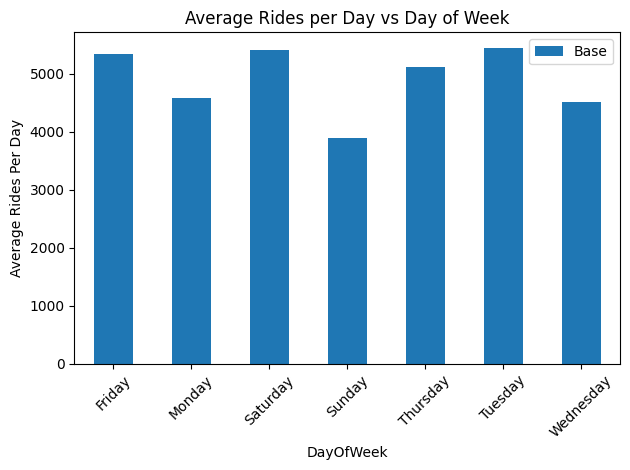

In [11]:
import matplotlib.pyplot as plt
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

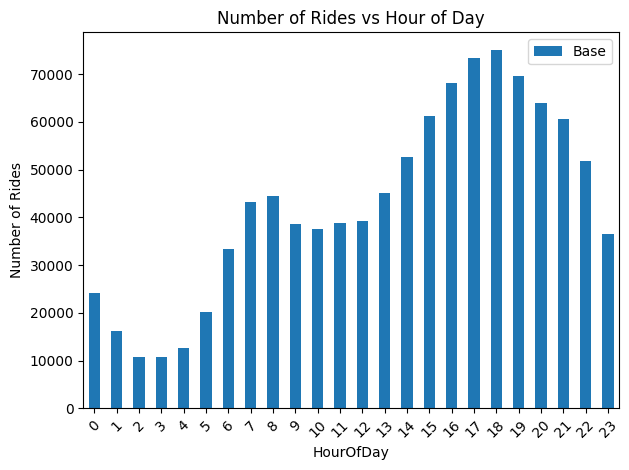

In [13]:
Hours = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
Hours/30
Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

<Axes: xlabel='HourOfDay'>

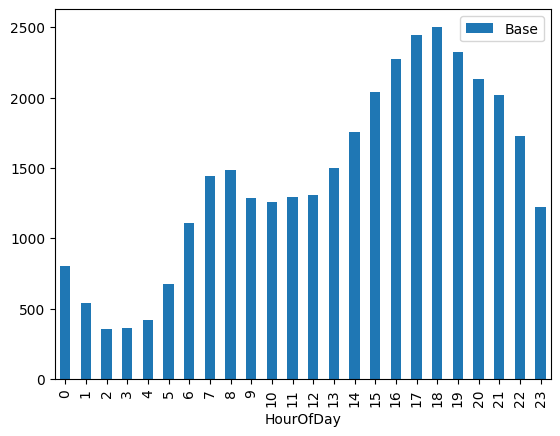

In [14]:
avgHours=Hours/30
avgHours.plot(kind='bar')

(16500.0, 18000.0)

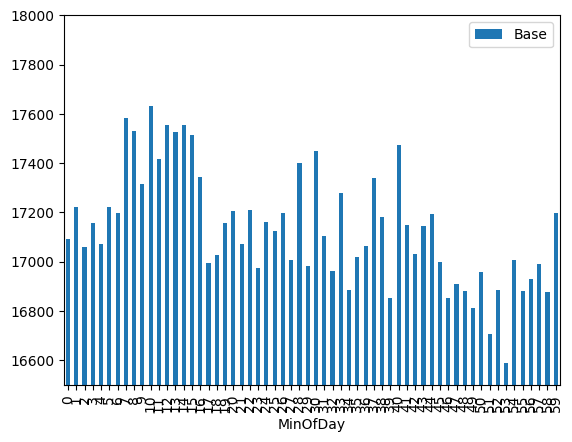

In [15]:
min = uber_data.pivot_table(index=['MinOfDay'],
                                  values='Base',
                                  aggfunc='count')
min.plot(kind='bar')
plt.ylim(16500,18000)

In [17]:
min.max()
min.min()
print(Hours)

            Base
HourOfDay       
0          24133
1          16107
2          10702
3          10789
4          12675
5          20262
6          33307
7          43314
8          44477
9          38542
10         37634
11         38821
12         39193
13         45042
14         52643
15         61219
16         68224
17         73373
18         75040
19         69660
20         63988
21         60606
22         51817
23         36568
